# PORTFOLIO OPTIMIZATION

### Made by: María Ángeles Magro Garrote

## A) Problem formulation

### Description of the problem

In the context of finance, a portfolio optimization is the process of selecting an optimal asset distribution, according to some objective. This is a critical point in portfolio investment. In this scenario, the assets are several companies with unique features such as the expected return and the sector they belong to. The main goal is to allocate the resources among these companies in order to maximize the overall return while being subject to several constraints, including budgetary limits and sector-specific investment guidelines among others.


Taking the general formulation of the problem into account the following terms are going to be defined:
* <b><u>Model sets</u></b>: the only model set that is going to be used in our model is <b>"model.i"</b> which represents the companies in our portfolio. Each company is identified with the index "i".


* <b><u>Parameters</u></b>: 
    * <b>model.r</b>: This parameter represents the <u>expected return</u> for each company. The expected return for each company is calculated with the mean of the returns for the previous months. This is done using previous stock market data. The corresponding formula is: 

    <img src="reward_calculation.png" width="600" height="500">
    
    The natural logarithm of the percentage change is taken for calculating the return among two months. Using the natural logarithm has the effect of normalizing the returns. Then, for calculating the mean of all the returns the sum of all of the mis done and divided into all the months for which there is data.
    </br>
    * <b> model.var </b>: This parameter represents the <u>variances</u> of the companies calculated from the stock prices of the previous months. 
    * <b>model.sector</b>: This parameter represents the <u>sector</u> each company belongs to. It is useful to control the allocation of funds to different sectors.
    * <b>model.budget</b>: This parameter represents the <u>total budget</u> available for investment.
    * <b>model.max_asset</b>: This parameter represents the <u>maximum percentage of the budget</u> that can be invested in a <u>single asset</u>.
    * <b>model.max_sector</b>: This parameter represents the <u>maximum percentage</u> of the budget that can be invested in a <u>single sector</u>.
    * <b> model.max_var</b>: This parameter represents the percentage of the <u>highest variance</u> generated that the model can afford. For example, 0.8 would mean that the maximum variance that a company selected can have is the 80% of the highest variance in our dataset of companies.
    
    
* <b><u>Decision variable</u></b>: Our decision variable "model.x" represents the money invested in each asset (company in our case). This amount will be optimized so that the portfolio's expected return is maximized.


* <b><u>Objective function</u></b>: The objective function, focused on the expected returns and decision variables, provides a quantitative measure of success maximizing the total expected return within the defined constraints. Then, the objective function is the sum of the expected returns weighted by the proportion of the budget invested in each asset. Therefore, the formula needed to solve this linear problem is: <img src="objective_function.png" width="300" height="200"> Here: 
    * i iterates all over the different companies
    * ri is the expected return of the company i
    * xi is the amount of money invested in the company i
    
    The objective is to <u>MAXIMIZE</u> this function, which represents the expected return per investment in each asset of the portfolio. The optimization process will find the optimal allocation of funds to maximize the total expected return while adhering to the given constraints.
   
* <b><u>Constraints</u></b>
1) Total Budget Lower Bound: "budget_constraint_lower_rule" ensures that at least 50% of the budget is invested. 
</br>
<img src="total_budget_lower_bound.png" width="300" height="200">
</br>

2) Total Budget Upper Bound: "budget_constraint_upper_rule" ensures that, at much, no more money is invested than the budget.
</br>
<img src="total_budget_upper_bound.png" width="300" height="200">
</br>

3) Non-negative values: "non_negativity_constraint_rule" ensures that there can not be negative money invested, which is not feasible. 
</br>
 <img src="nonnegative_constraint.png" width="220" height="70">
</br>

4) Maximum Asset Weight: "max_weight_constraint_rule" limits the percentage of the budget that can be associated to an individual company. 
 </br>
 <img src="maximum_weight_asset.png" width="500" height="400">
</br>
5) Sector Investment Constraint: "sector_investment_constraint_rule" ensures that the total investment in any sector does not exceed a specified percentage of the total budget.
 </br>
 <img src="maximum_weight_sector.png" width="500" height="400">

6) Maximum Variance Constraint: "max_variance_ctr_rule " limits the variance of each company stock prices by using the maximum variance in the dataset and limiting it to a ratio (from 0 to 1) of it.

 <img src="maximum_variance.png" width="450" height="350">




### Data creation

Note that the stock prices and sectors of each company have been randomly created.

In [1]:
# Libraries

import random # for data generation 
from pyomo.environ import * # model creation and solving
import numpy as np # graphs and calculations
import matplotlib.pyplot as plt # graphs
import seaborn as sns # graphs

These parameters can be personalized depending on the preferences the user may have. The rest of the code must not be edited. 

In [2]:
# YOU CAN ADJUST THIS PARAMETERS AS WANTED!

budget = 1000000 # Total budget
num_companies = 100 # Number of companies = NUMBER OF DECISION VARIABLES
years = 1 # Years of previous stock prices that will be analysed
max_asset_percentage = 0.2 # Maximum percentage of the budget that can be invested in an unique asset
max_sector_percentage = 0.25 # Maximum percentage of the budget that can be invested in the same sector
max_variance = 0.8 # Maximum variance (Percentage from the maximum variance in the dataset)

In [3]:
if num_companies < 20:
    raise ValueError("It is needed at least 20 companies!")

In [4]:
# For reproducible results of the random library
random.seed("12")

As mentioned in the statement, first, different stock prices are generated for the selected number of previous months.

In [5]:
# Generating historical data for the number of months chosen for each company

companies_data = {}
for i in range(num_companies):
    company = f'C{i}'  # Company name
    prices = [] 
    for j in range(years * 12):
        price = random.uniform(100, 1000) # The stock price may vary among 100 and 1000
        prices.append(price) 
    companies_data[company] = prices # A dictionary is created that will have the data of all the months

In [6]:
# Display the first n entries of the dictionary for more understanding
n = 3

for key, value in list(companies_data.items())[:n]:
    print(f'{key}: {value}')

C0: [632.992657393448, 758.7942579483899, 377.42778529917064, 473.3179990468413, 680.3278729232978, 948.8635342909175, 428.3201175951937, 718.0267178402919, 305.2120260726755, 663.5636966717808, 695.1009956501019, 565.6587919465924]
C1: [854.1026944949367, 202.08919303668677, 617.1796180768866, 112.51862400515611, 173.25751286511507, 961.9280459503759, 208.957376854587, 182.9526129827911, 980.2730157479245, 626.3612812538828, 545.3582734541492, 257.9918619413945]
C2: [833.0918476057964, 884.2354219291424, 792.6447276470675, 461.69089558493073, 559.8417119467133, 920.5720530880884, 186.3797078170678, 627.3761189742769, 633.8024575880471, 658.6012342324833, 742.3040448270366, 839.1401397105765]


Taking into account the data that is available now, the formula mentioned in the statement (formula return = log (price of this month / price of the previous month) for calculating the return for consecutive months is applied. Then, once all the returns for a key (company) have been calculated, the mean is done among all of them.

In [7]:
# dictionary that will be used for model.r
company_expected_returns = {}

# loop for each company and then for each stock price available.
for company, stock_prices in companies_data.items():
    monthly_returns = [] #list where returns are stored
    for i in range(1, len(stock_prices)):
        return_value = np.log(stock_prices[i] / stock_prices[i - 1]) #formula for return
        monthly_returns.append(return_value)
    
    # Calculate the mean (expected return) of monthly returns
    expected_return = sum(monthly_returns) / len(monthly_returns)
    
    # Storing it into the dictionary
    company_expected_returns[company] = round(expected_return,2)

In [8]:
# Preview of model.r
n = 5

for key, value in list(company_expected_returns.items())[:n]:
    print(f'{key}: {value}')

C0: -0.01
C1: -0.11
C2: 0.0
C3: -0.03
C4: -0.03


Instead of creating again a loop for the names of the companies, the names can be obtained from the dictionaries keys.

In [9]:
# this list is going to be used for the creation of model.i
companies = list(companies_data.keys())

Using the stock prices, a variance is calculated for each company

In [10]:
# Calculate variances for each company
variances = {company: sum((value - sum(data) / len(data))**2 for value in data) / len(data) for company, data in companies_data.items()}

In [11]:
# Preview of variances
n = 3

for key, value in list(variances.items())[:n]:
    print(f'{key}: {value}')

C0: 30369.034943126186
C1: 98686.22208669172
C2: 39667.10038285634


Randomly, among a list of different sectors, each one is going to be assigned to at least one company.

In [12]:
# Define the set of sectors. All the sectors are partnered with at least on company. 
sectors = ['Technology', 'Finance', 'Healthcare', 'Other', 'Energy', 
    'Consumer Goods', 'Telecommunications', 'Manufacturing']

# Calculate the number of sectors
num_sectors = len(sectors)

# Order the sectors randomly    
random.shuffle(sectors)

# Create a dictionary to store the mapping of companies to sectors
company_sector= {}

# Assign sectors to companies
for i in range(num_companies):  
    if i >= num_sectors:
        # Shuffle the sectors after all of them have been assigned to ensure more random results
        random.shuffle(sectors)
    company = companies[i]
    # Use modulo to cycle through sectors
    sector = sectors[i % num_sectors] 
    company_sector[company] = sector

In [13]:
# Preview of model.sector
n = 3

for key, value in list(company_sector.items())[:n]:
    print(f'{key}: {value}')

C0: Technology
C1: Manufacturing
C2: Finance


## B) Implementation of the model in a Pyomo notebook

In [14]:
model = ConcreteModel()

# Companies
model.i = Set(initialize=companies, doc="Companies")
# Returns
model.r = Param(model.i, initialize=company_expected_returns, doc="Expected return")
# Variances
model.var = Param(model.i, initialize = variances, doc = "Variances")
# Sectors
model.sector = Param(model.i, initialize=company_sector, doc="Sector of each company")

# Total budget
model.budget = Param(initialize = budget, doc = 'Total budget')
# Maximum weight per asset
model.max_asset = Param(initialize = max_asset_percentage, doc = 'Maximum percentage of budget that can be invested in an asset')
# Maximum weight per sector
model.max_sector = Param(initialize = max_sector_percentage, doc = 'Maximum percentage of budget that can be invested in a sector')
# Maximum variance 
model.max_var = Param(initialize = max_variance, doc = 'Maximum variance of a company')

# Decision variable
model.x = Var(model.i, doc="Weights per asset", within=NonNegativeReals)

# For storing dual values
model.dual = Suffix(direction=Suffix.IMPORT)

The default domain for Param objects is 'Any'.  However, we will be changing
that default to 'Reals' in the future.  If you really intend the domain of
this Paramto be 'Any', you can suppress this warning by explicitly specifying
'within=Any' to the Param constructor. (deprecated in 5.6.9, will be removed
in (or after) 6.0) (called from
C:\Users\mamgm\anaconda3\envs\Optimization\lib\site-
packages\pyomo\core\base\indexed_component.py:716)


In [15]:
# Objective rule where the goal is to maximize the expected return
def objective_rule(model):
    return sum(model.r[i] * model.x[i] for i in model.i)
model.obj = Objective(rule=objective_rule, sense=maximize, doc='Expected return per asset')

In [16]:
# Constraint: Total Budget Lower Bound
def budget_constraint_lower_rule(model):
    # Ensure that the total investment in the portfolio is at least half of the total budget
    return sum(model.x[i] for i in model.i) >= model.budget / 2
model.budget_constraint_lower_rule = Constraint(rule=budget_constraint_lower_rule, doc='Total Budget Lower Bound')

# Constraint: Total Budget Upper Bound
def budget_constraint_upper_rule(model):
    # Ensure that the total investment in the portfolio does not exceed the total budget
    return sum(model.x[i] for i in model.i) <= model.budget
model.budget_constraint_upper_rule = Constraint(rule=budget_constraint_upper_rule, doc='Total Budget Upper Bound')

# Constraint: Non-Negativity Weights
def non_negativity_constraint_rule(model, i):
    # Ensure that the weights assigned to each asset are non-negative
    return model.x[i] >= 0
model.non_negativity_constraint_rule = Constraint(model.i, rule=non_negativity_constraint_rule, doc="Non-Negative Weights")

# Constraint: Maximum Asset Weight
def max_weight_constraint_rule(model, i):
    # Ensure that the weight of each individual asset does not exceed a certain percentage of the total budget
    return model.x[i] <= model.budget * model.max_asset
model.max_weight_constraint_rule = Constraint(model.i, rule=max_weight_constraint_rule)

# Constraint: Sector Investment Constraint
def sector_investment_constraint_rule(model, sector):
    # Calculate the total investment in the current sector
    total_sector_investment = sum(model.x[i] for i in model.i if model.sector[i] == sector)
    # Ensure that the total investment in the sector does not exceed a certain percentage of the total budget
    return total_sector_investment <= model.budget * model.max_sector
model.sector_investment_constraint_rule = Constraint(sectors, rule=sector_investment_constraint_rule)

# Constraint: Maximum Variance Constraint
def max_variance_ctr_rule(model, i):
    # Maximum allowed value for model.v[i] * model.x[i] based on range_upper
    max_allowed_value = max(model.var.values()) * model.max_var * model.x[i]

    # Ensure that model.v[i] * model.x[i] does not exceed the maximum allowed value
    return model.var[i] * model.x[i] <= max_allowed_value

model.max_variance_ctr_rule = Constraint(model.i, rule=max_variance_ctr_rule)


In [17]:
# Solve the problem
opt = SolverFactory("glpk")
opt.solve(model)

print("The companies that will be chosen and the amount of budget allocated to them are:")

# We will only display the companies in which some money will be invested
tol = 1e-4
for k in model.x.keys():
    if abs(model.x[k].value)>tol:
        print (model.x[k].getname(), round(model.x[k].value,2))
        
print("The expected return (benefits) for a month is", model.obj())

The companies that will be chosen and the amount of budget allocated to them are:
x[C16] 200000.0
x[C35] 50000.0
x[C41] 50000.0
x[C42] 50000.0
x[C43] 200000.0
x[C46] 50000.0
x[C91] 200000.0
x[C92] 200000.0
The expected return (benefits) for a month is 147000.0


A graph may also give a good representation of the solution of our problem:

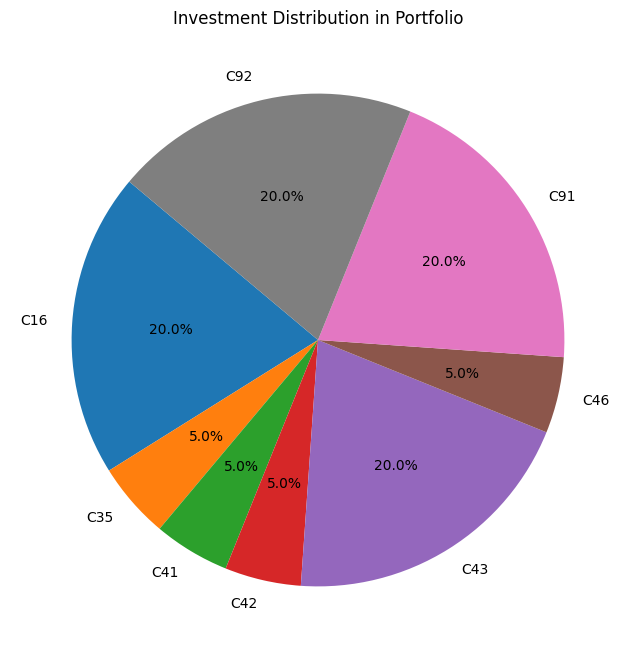

In [18]:
# Extract companies and investments for which money has been invested
invested_companies = [i for i in model.i if model.x[i].value > 0]
investments = [model.x[i].value for i in invested_companies]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(investments, labels=invested_companies, autopct='%1.1f%%', startangle=140)
plt.title('Investment Distribution in Portfolio')
plt.show()

## C) Constraints sensitivities

### Dual values

The dual values of the constraints represent the rate of change of the objective function with respect to a one-unit increase in the right-hand side of that constraint, while keeping all other constraints unchanged.

The dual values that are different from 0 in this model are going to be displayed:

In [19]:
for key, value in model.dual.items():
    if value != 0:
        print(f"{key} : {value}")

budget_constraint_upper_rule : 0.09
max_weight_constraint_rule[C16] : 0.06
max_weight_constraint_rule[C91] : 0.03
max_weight_constraint_rule[C92] : 0.02
sector_investment_constraint_rule[Consumer Goods] : 0.02
sector_investment_constraint_rule[Telecommunications] : 0.03
sector_investment_constraint_rule[Manufacturing] : 0.09


Why among all are this the only constraints that have dual values in this case? To answering this question, it is necessary to recall the data among the selected companies.

In [20]:
# Get the indices of selected companies (where model.x[i] is non-zero)
selected_companies = [i for i in model.i if model.x[i].value != 0]

# Access the corresponding expected returns, sectors, and money invested
selected_returns = [model.r[i] for i in selected_companies]
selected_sectors = [model.sector[i] for i in selected_companies]
selected_investments = [model.x[i].value for i in selected_companies]

# Parameters print
print("Parameters:")
print("Total budget:", model.budget())
print("Maximum weight per asset:", model.max_asset())
print("Maximum weight per sector:",model.max_sector())
print("")

# Print or use the selected returns, sectors, and investments as needed
print("Selected Companies:")
for i, ret, sector, investment in zip(selected_companies, selected_returns, selected_sectors, selected_investments):
    print(f"Company {i}: Investment = {round(investment,2)}, Return = {ret}, Sector = {sector}")


Parameters:
Total budget: 1000000
Maximum weight per asset: 0.2
Maximum weight per sector: 0.25

Selected Companies:
Company C16: Investment = 200000.0, Return = 0.15, Sector = Healthcare
Company C35: Investment = 50000.0, Return = 0.11, Sector = Consumer Goods
Company C41: Investment = 50000.0, Return = 0.09, Sector = Finance
Company C42: Investment = 50000.0, Return = 0.12, Sector = Telecommunications
Company C43: Investment = 200000.0, Return = 0.18, Sector = Manufacturing
Company C46: Investment = 50000.0, Return = 0.18, Sector = Manufacturing
Company C91: Investment = 200000.0, Return = 0.15, Sector = Telecommunications
Company C92: Investment = 200000.0, Return = 0.13, Sector = Consumer Goods


### Analysis

First, notice the companies with a higher investment: C16, C43, C91 and C92. This four companies have an investment of 200.000, the maximum amount of money per asset that is possible. That is why there is positive dual values in:
* <b>max_weight_constraint_rule[C16] : 60000.0</b>

For C16, the dual value is 60000.0. This means that increasing the weight (investment) in C16 by one unit would increase the objective function value by 60000.0. It indicates the marginal benefit of investing more in this specific company. (More information in the questions below)

* <b>max_weight_constraint_rule[C91] : 30000.0</b>

For Company C91, the dual value is 30000.0. Increasing the weight (investment) in C91 by one unit would increase the objective function value by 30000.0.

* <b>max_weight_constraint_rule[C92] : 20000.0</b>

For Company C92, the dual value is 20000.0. Similar to the previous cases, increasing the weight (investment) in Company C92 by one unit would increase the objective function value by 20000.0.

<u>Why there are the duals different among C16 and C91 if they have the same return level (0.15)? </u>

While C91 also has a high expected return (0.15, the same as C16), the dual value is lower than that of C16. This suggests that, compared to C16, allocating additional budget to C91 contributes less to the overall improvement in the objective function. It could be due to factors such as the diversity of the portfolio. Notice that C91 (Telecommunications) and C92 (Consumer Goods) belong to sectors that are alredy in other companies selected and therefore the budget invested in the companies is limited also by the maximum weight per sector.

<u>What happens with C92 dual value? </u>

C92 has the lowest expected return among the three discussed (0.13). The lower dual value indicates that the marginal improvement in the objective function by increasing the weight of C92 is less compared to C16 and C91. The optimization process is indicating that, given the current circumstances, investing more in C92 provides a lower return for the overall portfolio.


Another question that may arise is: <u>what is the reason for the ausence of a dual value for max_weight_constraint_rule of C43? </u>. 

This means that a change in the maximum weight per asset constraint does not affect the budget allocated to this variable. Now the focus must be set on the sector of this variable which happens to be Manufacturing. There is alredy another company, C46, with the same return (0.18, the same as C43)in the same sector and recalling: 

* <b>sector_investment_constraint_rule[Manufacturing] : 0.09 </b>

Increasing the budget allocation to the Manufacturing sector by one unit would result in the highest increase in the objective function (0.09) value among the three sectors with a dual value different from 0. Despite this, this value is low and may inidicate that increasing the investment in this sector beyond the specified constraint does not lead to a significant improvement in the overall expected return. Therefore, the contrains appears because the maximum budget has been allocated to the sector Consumer Goods and the optimal budget distribution among this sector has been reached.

Returning to the initial question of why C43 dual value in max weight per asset constraints is zero, this dual value means that the budget associated to this variable has been limited by the sector constraint and increasing the budget allocated to C43 would violate another constraint first because both companies (C43 and C46) allocated budget correspond to 250.000, the maximum allowed budget per sector.

Other sectors affected by the maximum weight per sector constraint are:

* <b>sector_investment_constraint_rule[Consumer Goods] : 0.02</b>

An increase in the total investment in the Consumer Goods sector by a small amount (0.02 times the total budget), the expected return (objective function) would increase by this amount. However, the optimization process has determined that the current allocation of funds to the Consumer Goods sector is optimal, and increasing the investment in this sector beyond the specified constraint does not lead to a significant improvement in the overall expected return. Therefore, the contrains appears because the maximum budget has been allocated to the sector Consumer Goods.

* <b> sector_investment_constraint_rule[Telecommunications] : 0.03</b>
The same that has been stated before happens with the sector Telecommunications

Finally, the dual value left is:

* <b>budget_constraint_upper_rule : 0.09</b>

Notice that all the budget has been inverted and due to the positive dual value, it can be guessed that there are some companies with a positive return that have no budget invested in and would be worth to look forward to (although they are not as profitable as the companies alredy chosen).

Not all the constraints have dual values. In fact, almost all constraints are 0 for almost all companies. The reason of this is because the condition represented by the constraint is not a limiting factor with our data in achieving the optimal objective value.

## D) Problem reformulation. Binary and Integer constraints.

With the use of new variables, the complexity of our problem can be increased so that it represents a closer example of a real life situation. In order to add new binary variables/parameters/constraints it may be necessary to re-create the model. 

The difference with the previously stated model would be that it will be assumed that each company will have a different cost depending on the taxes (some type of companies may have deductions due to the type of company or the region it is located in), transaction expenses, management fees, settlement and liquidity costs among others. Therefore, the model will need to take into account this cost (once it has been selected, that is when the binary variable enters). Furthermore, other two new parameters were created: one parameter contains the information about the existence of dividends in the company and the other about wether the company has a positive or a negative image analysing recent news (sentiment).

* <b><u>Model sets</u></b>: Again, our model set is going to be <b>"model.i"</b> which corresponds to the list of companies.

* <b><u>Parameters</u></b>: 
        
    <u>Old parameters used again </u>
    * <b>model.r</b>: companies' returns 
    * <b>model.var</b>: companies' variances
    * <b>model.sector</b>: companies' sectors
    * <b>model.budget</b>: total budget available for investment.
    * <b>model.max_asset</b>: maximum percentage of the budget that can be invested in a single asset.
    * <b>model.max_sector</b>: maximum percentage of the budget that can be invested in a single sector.
    * <b>model.max_var</b>: maximum ratio of the highest variance a company can have
    

    <u> New parameters </u>
    * <b> model.cost </b>: integer parameter that contains the cost of investing in each company.
    * <b> model.dividends </b>: binary parameter that represents if the company gives out dividends (1) or not (0). 
    * <b> model.sentiment </b>: binary parameter that represents whether recent news sentiment for the asset is positive (1) or not (0). 
    * <b> model.max_assets </b>: integer parameter that defines the maximum number of assets in which the user can invest.
    * <b> model.min_assets </b>: integer parameter that defines the minimum number of assets in which the user can invest.
    
* <b><u> Variables </u></b>:

    <u>Old Variable</u>
    * <b>model.x</b>: Weights per asset for each company
    
    <u>New Variable</u>
    * <b> model.y</b>: Binary variable for each company. It represents if anything is invested (1) or not (0)
    
* <b><u> Objective function </u></b>: the objective function aims to find the best allocation of weights to assets in the portfolio, taking into account the fixed costs associated with selected assets so that the function takes into account the return and the cost of including that company in the portfolio.

  <img src="objective_function2.PNG" width="400" height="300">
  
  Here: 
    * i iterates all over the different companies
    * ri is the expected return of the company i
    * xi is the amount of money invested in the company i
    * yi is if the company i has been selected for investment (0) or not (1)

* <b><u> Constraints </b></u>:

   <u>Old constraints used again </u>
    1) <b>Total Budget Lower Bound</b>
    3) <b>Non-negative values</b>
    5) <b>Sector Investment Constraint</b>
    6) <b>Maximum Variance Constraint</b>
    
    Maximum Asset Weight constraint can be skipped due to a binary constraint. In the new constraints it will be explained.
    
    <u>New constraints used again </u>
    
    7) <b>Binary Selection</b>: "binary_selection_constraint_rule" ensures that if something is invested in company i, then model.y[i] value would correspond to 1. Following that train of thoughts, if nothing is inverted then model.y[i] should be 0.
    
        <img src="binary_selection.png" width="300" height="200">
    
    8) <b>Binary Non-Selection</b>: "binary_non_selection_constraint_rule" ensures that if an asset is not selected (y[i] == 0), then the weight (x[i]) is zero. In case the asset is selected, the amount of money invested should not exceed the maximum stated in the previous model. With this condition, the previously created constraint "Maximum Asset Weight" can be eliminated.
            <img src="binary_nonselection.png" width="500" height="400">

    9) <b>Minimum Number of Assets</b>: "minimum_assets_constraint_constraint_rule" ensures that a minimum number of assets is chosen. In this case, it is ensured that there are at least 10 companies selected. 
            <img src="min_number_assets.png" width="400" height="300">
            
    9) <b>Minimum Number of Assets</b>: "minimum_assets_constraint_constraint_rule" ensures that a maximum number of assets is chosen. In this case, it is ensured that there are at much 25 companies selected. 
            <img src="max_number_assets.png" width="400" height="300">

    10) <b>Minimum Investment</b>: "minimum_investment_constraint_rule" ensures that if something is invested in a coompany, a minimum amount of capital must be destinated to it.
             <img src="min_investment.png" width="300" height="200">

### Data generation for new parameters

In [21]:
# Personalizable parameters
min_number_comp = 10
max_number_comp = 25

In [22]:
# Generate random binary values for dividends (0 or 1)
dividends_data = {i: random.choice([0, 1]) for i in companies}

# Generate random binary values for news sentiment (0 or 1)
news_sentiment_data = {i: random.choice([0, 1]) for i in companies}

# Generate random costs values
costs = {company: round(random.uniform(5000, 10000), 2) for company in companies}

### Implementation of the model in a Pyomo notebook

In [23]:
from pyomo.environ import *

model = ConcreteModel()

# ----------------------------- OLD PARAMETERS -----------------------------

# Companies
model.i = Set(initialize=companies, doc="Companies")
# Returns
model.r = Param(model.i, initialize=company_expected_returns, doc="Expected return")
# Variances
model.var = Param(model.i, initialize = variances, doc = "Variances")
# Sectors
model.sector = Param(model.i, initialize=company_sector, doc="Sector of each company")
# Costs
model.cost = Param(model.i, initialize=costs, doc="Sector of each company")


# Total budget
model.budget = Param(initialize = budget, doc = 'Total budget')
# Maximum weight per asset
model.max_asset = Param(initialize = max_asset_percentage, doc = 'Maximum percentage of budget that can be invested in an asset')
# Maximum weight per sector
model.max_sector = Param(initialize = max_sector_percentage, doc = 'Maximum percentage of budget that can be invested in a sector')
# Maximum variance 
model.max_var = Param(initialize = max_variance, doc = 'Maximum variance of a company')
# Maximum number of assets
model.max_assets = Param(initialize = max_number_comp, doc = 'Maximum number of assets')
# Minimum number of assets
model.min_assets = Param(initialize = min_number_comp, doc = 'Minimum number of assets')

# ----------------------------- NEW PARAMETERS -----------------------------
# Binary parameter for dividends
model.dividends = Param(model.i, initialize=dividends_data, doc="Dividends variable", within=Binary)
# Binary parameter for news sentiment
model.sentiment = Param(model.i, initialize=news_sentiment_data, doc="News sentiment variable", within=Binary)

# ----------------------------- OLD VARIABLE -----------------------------

model.x = Var(model.i, doc="Weights per asset", within=NonNegativeReals)

# ----------------------------- NEW VARIABLE -----------------------------

model.y = Var(model.i, doc="Binary variable", within=Binary)

In [24]:
# Objective rule with binary variable
def objective_rule(model):
    return sum(model.r[i] * model.x[i] - model.y[i] * model.cost[i] for i in model.i)

model.obj = Objective(rule=objective_rule, sense=maximize, doc='Expected return per asset considering fixed costs')

In [25]:
# ----------------------------- OLD CONSTRAINTS -----------------------------

# Constraint: Total Budget Lower Bound
def budget_constraint_lower_rule(model):
    # Ensure that the total investment in the portfolio is at least half of the total budget
    return sum(model.x[i] for i in model.i) >= model.budget / 2
model.budget_constraint_lower_rule = Constraint(rule=budget_constraint_lower_rule, doc='Total Budget Lower Bound')

# Constraint: Total Budget Upper Bound
def budget_constraint_upper_rule(model):
    # Ensure that the total investment in the portfolio does not exceed the total budget
    return sum(model.x[i] for i in model.i) <= model.budget
model.budget_constraint_upper_rule = Constraint(rule=budget_constraint_upper_rule, doc='Total Budget Upper Bound')

# Constraint: Non-Negativity Weights
def non_negativity_constraint_rule(model, i):
    # Ensure that the weights assigned to each asset are non-negative
    return model.x[i] >= 0
model.non_negativity_constraint_rule = Constraint(model.i, rule=non_negativity_constraint_rule, doc="Non-Negative Weights")

# Constraint: Sector Investment Constraint
def sector_investment_constraint_rule(model, sector):
    # Calculate the total investment in the current sector
    total_sector_investment = sum(model.x[i] for i in model.i if model.sector[i] == sector)
    # Ensure that the total investment in the sector does not exceed a certain percentage of the total budget
    return total_sector_investment <= model.budget * model.max_sector
model.sector_investment_constraint_rule = Constraint(sectors, rule=sector_investment_constraint_rule)

# Constraint: Maximum Variance Constraint
def max_variance_ctr_rule(model, i):
    # Maximum allowed value for model.v[i] * model.x[i] based on range_upper
    max_allowed_value = max(model.var.values()) * model.max_var * model.x[i]

    # Ensure that model.v[i] * model.x[i] does not exceed the maximum allowed value
    return model.var[i] * model.x[i] <= max_allowed_value

model.max_variance_ctr_rule = Constraint(model.i, rule=max_variance_ctr_rule)

# ----------------------------- NEW CONSTRAINTS -----------------------------
#           (they involve the binary variable and binary parameters)


# -- CREATION OF model.y[i] --

# Constraint: Binary Selection
def binary_selection_constraint_rule(model, i):
    return model.x[i] >= model.y[i] * 0.001  # small positive threshold 

model.binary_selection_constraint_rule = Constraint(model.i, rule=binary_selection_constraint_rule, doc='Binary selection constraint')

# Constraint: Binary Non Selection
def binary_non_selection_constraint_rule(model, i):
    return model.x[i] <= model.y[i] * model.max_asset * model.budget
model.binary_non_selection_constraint_rule = Constraint(model.i, rule=binary_non_selection_constraint_rule, doc='Binary non-selection constraint')

# ---------------------------

# Constraint: Minimum number of assets
def minimum_assets_constraint_constraint_rule(model):
    return sum(model.y[i] for i in model.i) >= model.min_assets
model.minimum_assets_constraint_constraint_rule = Constraint(rule=minimum_assets_constraint_constraint_rule, doc='Minimum number of assets that must be selected')

# Constraint: Maximum Number of Assets
def max_assets_constraint_rule(model):
    return sum(model.y[i] for i in model.i) <= model.max_assets

model.max_assets_constraint_rule = Constraint(rule=max_assets_constraint_rule, doc='Maximum number of assets that can be selected')

# Constraint: Minimum Investment
def minimum_investment_constraint_rule(model, i):
    return model.x[i] >= 10000 * model.y[i]
model.minimum_investment_constraint_rule = Constraint(model.i, rule=minimum_investment_constraint_rule, doc='Investment threshold constraint')


In [26]:
# Solve the problem
opt = SolverFactory("glpk")
opt.solve(model)

print("The companies that will be chosen and the amount of budget allocated to them are:")

# We will only display the companies in which some money will be invested
tol = 1e-4
for k in model.x.keys():
    if abs(model.x[k].value)>tol:
        print (model.x[k].getname(), round(model.x[k].value,2))
        
print("The expected return (benefits) for a month is", round(model.obj(),2))

The companies that will be chosen and the amount of budget allocated to them are:
x[C16] 200000.0
x[C35] 50000.0
x[C37] 10000.0
x[C42] 50000.0
x[C43] 200000.0
x[C46] 50000.0
x[C48] 30000.0
x[C88] 10000.0
x[C91] 200000.0
x[C92] 200000.0
The expected return (benefits) for a month is 78188.96


Due to the new constraints the choice of companies has varied slightly and, as a consequence, also the expected return. This information can be plotted:

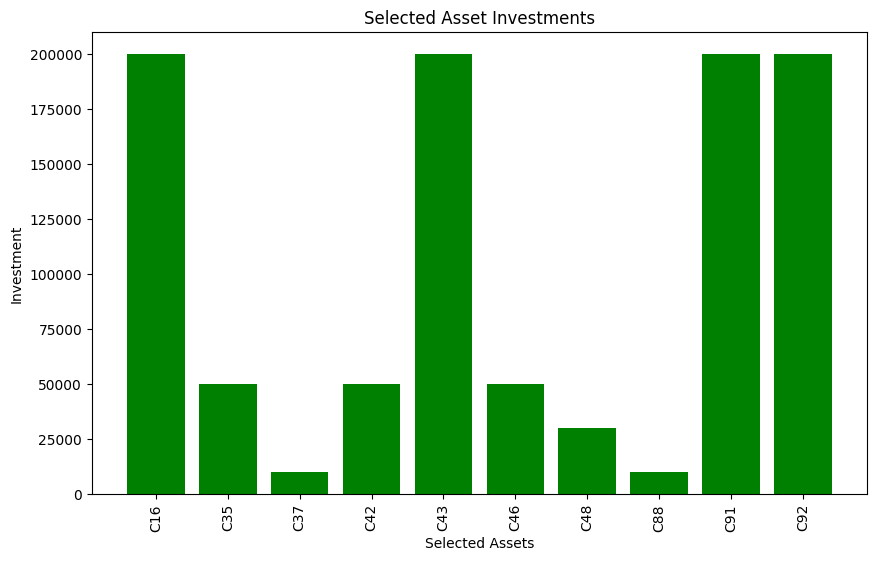

In [27]:
# Extracting the binary selection status for each asset
selected_assets = [i for i in model.i if model.y[i]() == 1]

# Creating a bar chart for selected assets only
fig, ax = plt.subplots(figsize=(10, 6))
assets = np.arange(len(selected_assets))

ax.bar(assets, [model.x[i]() for i in selected_assets], color='green')  # Bar color for selected assets

ax.set_xticks(assets)
ax.set_xticklabels(selected_assets, rotation='vertical')
ax.set_xlabel('Selected Assets')
ax.set_ylabel('Investment')
ax.set_title('Selected Asset Investments')

plt.show()

Furthermore, in order to analyse the the trade-off between expected return and risk (variance) for the selected assets in the portfolio optimization model.

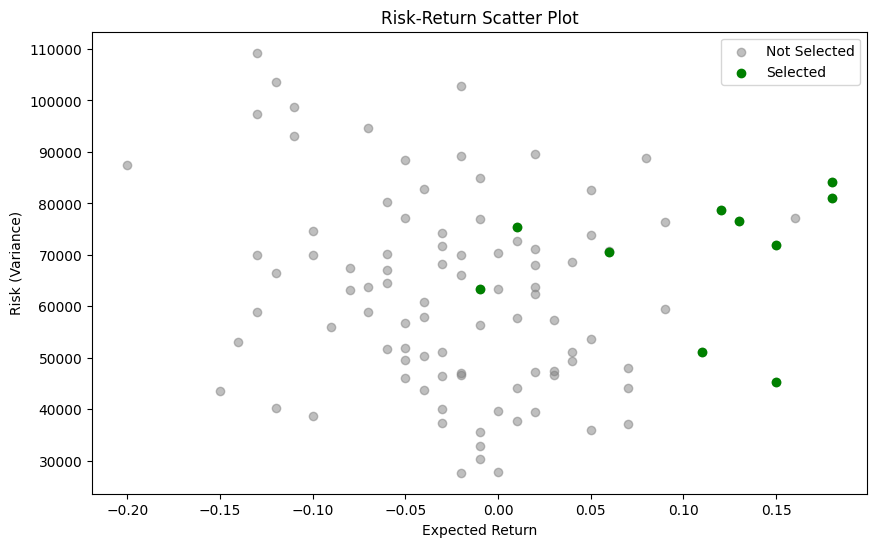

In [28]:
import matplotlib.pyplot as plt

# Assuming you have solved the model and have the results
# Replace 'results' with the actual results object from Pyomo
# results = model.solve()

# Extracting relevant information from the solved model
returns = [model.r[i] for i in model.i]
risks = [model.var[i] for i in model.i]
selected_assets = [i for i in model.i if model.y[i]() == 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(returns, risks, color='gray', label='Not Selected', alpha=0.5)
plt.scatter([model.r[i] for i in selected_assets], [model.var[i] for i in selected_assets], color='green', label='Selected')
plt.xlabel('Expected Return')
plt.ylabel('Risk (Variance)')
plt.title('Risk-Return Scatter Plot')
plt.legend()
plt.show()


The concentration of points in the right side area is logical due to the fact that it is where positive returns are allocated. On the other hand, the spread of selected assets in this area suggests a balanced distribution, minimizing exposure to extreme levels of risk.

## Conclusion of the Optimization Problem

Throughout this project it has been addressed a real-world decision-making problem related to investment portfolio optimization. Specifically, the problem main goal was to select the best combination of assets selection such that return obtained from them was maximized.

The first step was the selection of relevant information and the formulation of calculations for essential metrics such as returns and variances. Then, a simulation of these invented company was created using random data generators for the stock prices and the sectors. With this information, all the data necessary for the creation of the linear model was obtained and the pyomo formulation was done. In this process a dual variable was created in order to store the sensitivities from the constraints. Finally, the best combination of companies was retrieved. 

The second part of the project revolved around adding binary data to our model. In detail, new parameters, a variable and contraints were added so that the problem could represent better a realistic situation and to enhance the model's representational capacity. 

All this process was supported by plots and comments which helped understading the solutions that were obtained, which were different in the models due to the fact of the incorporation of new information. 

Summarizing, the success of this project lies in the understanding of the problem and what needs to be solve so that the model represent a representation of investment decision-making.